## Carga de datos

In [53]:
#Importar librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

- Carga de archivos


In [54]:
df_company_name =  pd.read_csv ('moved_project_sql_result_01.csv')
df_company_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [55]:
#Muestra de datos
df_company_name.sample(10)

,company_name,trips_amount
35,6742 - 83735 Tasha ride inc,39
39,0118 - 42111 Godfrey S.Awir,33
18,24 Seven Taxi,1775
41,Chicago Star Taxicab,29
37,1469 - 64126 Omar Jada,36
15,Checker Taxi Affiliation,2216
14,Patriot Taxi Dba Peace Taxi Associat,2235
2,Medallion Leasin,10367
21,American United,1404
43,2809 - 95474 C & D Cab Co Inc.,29


In [56]:
#Revisamos si existen duplicados 
df_company_name[df_company_name.duplicated()]


,company_name,trips_amount


In [57]:
df_dropoff = pd.read_csv ('moved_project_sql_result_04.csv')

df_dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [58]:
df_dropoff.sample(10)

,dropoff_location_name,average_trips
79,Fuller Park,8.166667
7,Museum Campus,1510.000000
52,Little Village,33.800000
66,Washington Park,16.033333
89,Mount Greenwood,3.137931
35,Norwood Park,95.233333
65,Ashburn,16.133333
38,Armour Square,77.033333
77,Archer Heights,8.366667
88,Undef,3.800000


In [59]:
#Revisamos si existen dulpicados
df_dropoff[df_dropoff.duplicated()]

,dropoff_location_name,average_trips


- Top 10 de barrios en terminos de finalizacion del recorrido


In [60]:
top_barrios = df_dropoff.sort_index(ascending=True).head(10)
top_barrios

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


- Grafico del top 10 de barrios  por numero de finalizaciones

C:\Users\Te Amo\AppData\Local\Temp\ipykernel_30408\3640250985.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="average_trips", y="dropoff_location_name", data=top_barrios, palette="Oranges_r")


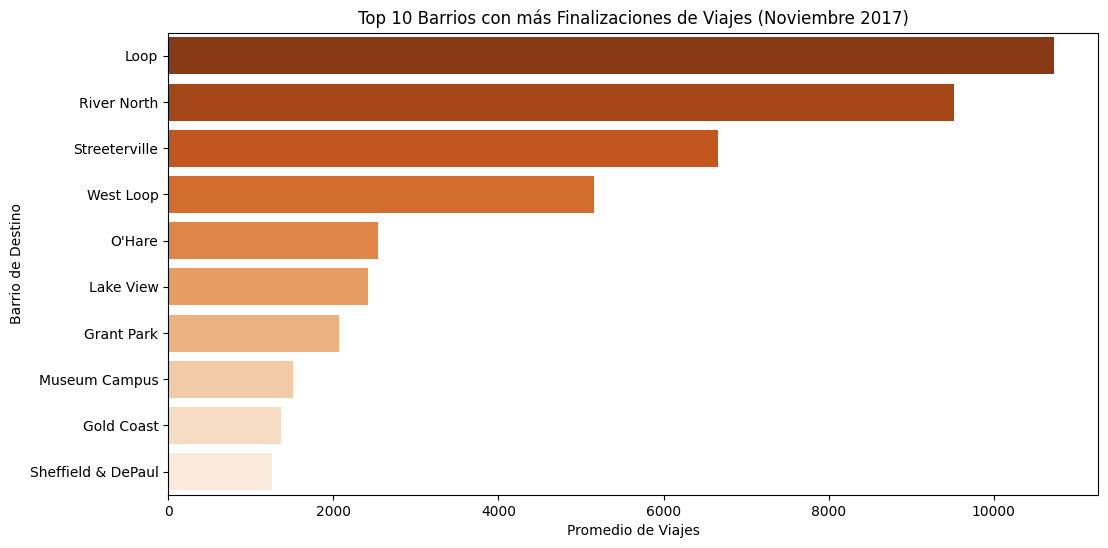

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(x="average_trips", y="dropoff_location_name", data=top_barrios, palette="Oranges_r")
plt.xlabel("Promedio de Viajes")
plt.ylabel("Barrio de Destino")
plt.title("Top 10 Barrios con más Finalizaciones de Viajes (Noviembre 2017)")
plt.show()

## Conclusiones

- Tendremos que saber a que significa el barrio loop, si son viajes de ida y vuelta debido a que es el numero 1 en el top, de igual forma tendremos que ver si el barrio es una zona con alta poblacion y si es un barrio de alto poder adquisitivo.
- Aunado a ello, tendriamos que ver si los viajes que realizaron hacen un recorrido mas grande o son viajes cortos 

### Gráfico de Empresas de Taxis y Número de Viajes

In [62]:
#Top 10 de las compañias con mayor viajes
top_taxis = df_company_name.sort_index(ascending=True).head(10)
top_taxis

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


C:\Users\Te Amo\AppData\Local\Temp\ipykernel_30408\2135217706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'trips_amount', y= 'company_name', data=top_taxis, palette='Blues_r')


<function matplotlib.pyplot.show(close=None, block=None)>

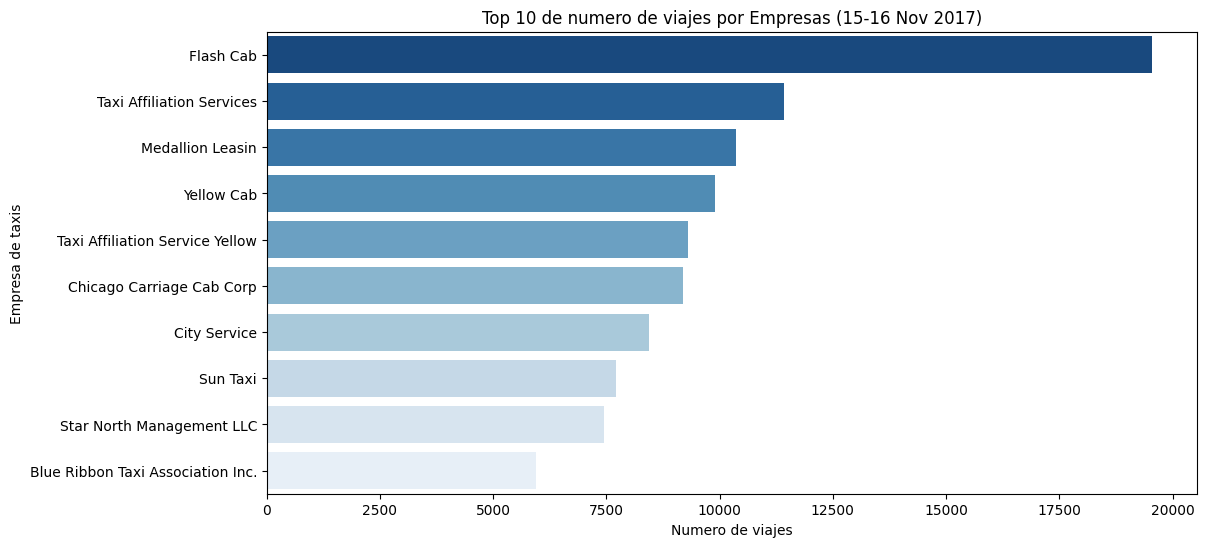

In [63]:
plt.figure (figsize=(12,6))
sns.barplot(x= 'trips_amount', y= 'company_name', data=top_taxis, palette='Blues_r')
plt.xlabel('Numero de viajes')
plt.ylabel('Empresa de taxis'),
plt.title ('Top 10 de numero de viajes por Empresas (15-16 Nov 2017)')
plt.show




### Conclusiones

- la mayoria de las empresas mantienen una tendencia, no se separan mucho a los competidores a excepcion de flash cab la cual si tiene una separacion de manera considerable, lo cual tendremos que ver si son viajes cortos, o si emitieron algun tipo de promocion donde podamos replicar para que las demas empresas puedan aumentar el numero de viajes, validamos si existe algun tipo de comodida, opciones de valor agregado, inclusive el clima que se tuvo 

## Prueba de hipótesis

In [64]:
#Cargar nuevo archivo 

df_trips = pd.read_csv ('moved_project_sql_result_07.csv')
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [65]:
#Muestra de datos 
df_trips.sample(10)

,start_ts,weather_conditions,duration_seconds
869,2017-11-18 11:00:00,Good,1800.0
125,2017-11-11 08:00:00,Good,1380.0
872,2017-11-04 12:00:00,Good,2239.0
89,2017-11-04 11:00:00,Good,2574.0
297,2017-11-04 16:00:00,Bad,2981.0
1042,2017-11-11 05:00:00,Good,1380.0
743,2017-11-18 07:00:00,Bad,1182.0
445,2017-11-04 10:00:00,Good,2694.0
907,2017-11-18 18:00:00,Good,1484.0
490,2017-11-18 12:00:00,Bad,2880.0


In [66]:
#Convertimos la columna start_ts en date frame
df_trips["start_ts"] = pd.to_datetime(df_trips["start_ts"])
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [67]:
# Extraer el día de la semana (0=Lunes, 6=Domingo) y filtrar solo los sábados
df_trips["day_of_week"] = df_trips["start_ts"].dt.dayofweek
df_trips.sample(10)


,start_ts,weather_conditions,duration_seconds,day_of_week
629,2017-11-04 06:00:00,Good,1472.0,5
971,2017-11-04 17:00:00,Bad,2340.0,5
269,2017-11-25 10:00:00,Good,1676.0,5
258,2017-11-18 14:00:00,Good,2994.0,5
906,2017-11-25 14:00:00,Good,1800.0,5
1042,2017-11-11 05:00:00,Good,1380.0,5
776,2017-11-11 12:00:00,Good,1909.0,5
133,2017-11-11 12:00:00,Good,2071.0,5
399,2017-11-11 06:00:00,Good,1560.0,5
858,2017-11-04 10:00:00,Good,1740.0,5


In [68]:
#Extraemos solo los sabados
saturdays = df_trips[df_trips["day_of_week"] == 5]  # 5 = Sábado
saturdays.sample(10)

,start_ts,weather_conditions,duration_seconds,day_of_week
731,2017-11-11 11:00:00,Good,1683.0,5
260,2017-11-11 11:00:00,Good,1620.0,5
716,2017-11-18 12:00:00,Bad,2175.0,5
432,2017-11-11 07:00:00,Good,1419.0,5
616,2017-11-04 16:00:00,Bad,3300.0,5
95,2017-11-04 10:00:00,Good,2551.0,5
974,2017-11-04 12:00:00,Good,3000.0,5
780,2017-11-18 21:00:00,Bad,1748.0,5
553,2017-11-11 12:00:00,Good,2330.0,5
234,2017-11-04 05:00:00,Good,1620.0,5


In [69]:
# Separar viajes en sábados lluviosos y otros sábados
rainy_saturdays = saturdays[saturdays["weather_conditions"].str.contains("Bad", na=False)]
other_saturdays = saturdays[~saturdays["weather_conditions"].str.contains("Bad", na=False)]

# Calcular la duración promedio de los viajes en segundos
mean_rainy = rainy_saturdays["duration_seconds"].mean()
mean_other = other_saturdays["duration_seconds"].mean()

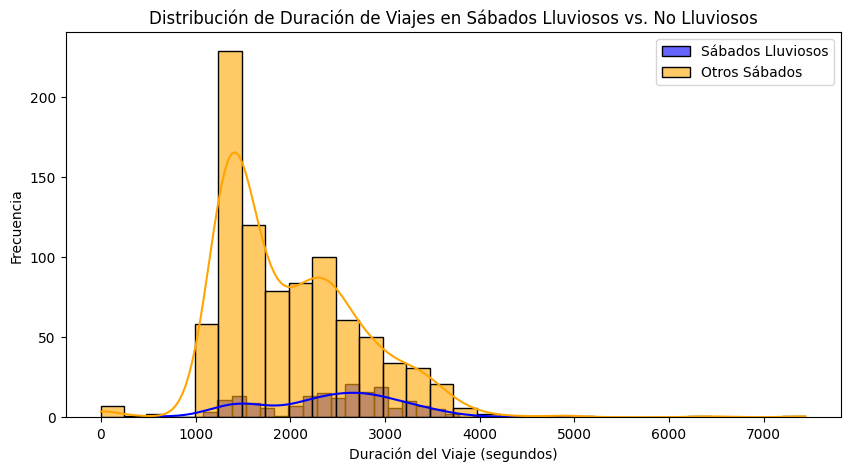

In [70]:
#Gráfico de distribución de duración de viajes
plt.figure(figsize=(10, 5))
sns.histplot(rainy_saturdays["duration_seconds"], color="blue", label="Sábados Lluviosos", kde=True, bins=30, alpha=0.6)
sns.histplot(other_saturdays["duration_seconds"], color="orange", label="Otros Sábados", kde=True, bins=30, alpha=0.6)
plt.xlabel("Duración del Viaje (segundos)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Duración de Viajes en Sábados Lluviosos vs. No Lluviosos")
plt.legend()
plt.show()

In [71]:
levene_stat, p_value = stats.levene(rainy_saturdays["duration_seconds"], other_saturdays["duration_seconds"])

# Resultados de la prueba de Levene
print(f"Estadístico de Levene: {levene_stat:.5f}")
print(f"Valor p: {p_value:.5f}")

if p_value < 0.05:
    print(" Las varianzas son significativamente diferentes entre los grupos (heterocedasticidad).")
else:
    print(" No hay evidencia suficiente para afirmar que las varianzas son diferentes (homocedasticidad).")


Estadístico de Levene: 0.38853
Valor p: 0.53320
 No hay evidencia suficiente para afirmar que las varianzas son diferentes (homocedasticidad).


In [72]:
#Resultado de la hipotesis

t_stat, p_value = stats.ttest_ind(rainy_saturdays["duration_seconds"], other_saturdays["duration_seconds"], equal_var=True)

#  Resultado de la hipótesis
print(f"Duración promedio - Sábados lluviosos: {mean_rainy:.2f} segundos")
print(f"Duración promedio - Otros sábados: {mean_other:.2f} segundos")
print(f"Estadístico t: {t_stat:.5f}")
print(f"Valor p: {p_value:.5f}")

if p_value < 0.05:
    print("🔍 Existe una diferencia estadísticamente significativa en la duración de los viajes en sábados lluviosos.")
else:
    print("✅ No hay evidencia suficiente para afirmar que la lluvia afecta la duración de los viajes en sábados.")

Duración promedio - Sábados lluviosos: 2427.21 segundos
Duración promedio - Otros sábados: 1999.68 segundos
Estadístico t: 6.94618
Valor p: 0.00000
🔍 Existe una diferencia estadísticamente significativa en la duración de los viajes en sábados lluviosos.


Se planteo una hipotesis nula, dado que en cuanto el clima es malo, la moyoria de las personas deciden transportarse para evitar mojarse por lo cual era intucion que exitia diferencia en un dia bueno a malo, hablando de clima, se establecio el valor_p . 05 ya que es lo sugerido cuando no tienes que ser tan estricto con el resultado, con esto el resultado de la hipotesis como bien lo indicamos si existe una diferencia de manera considerable en dias lluviosos o no 